<a href="https://colab.research.google.com/github/mukeshcse07/Machine-Learning-Project/blob/main/Basic_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


sns.set(style="whitegrid")

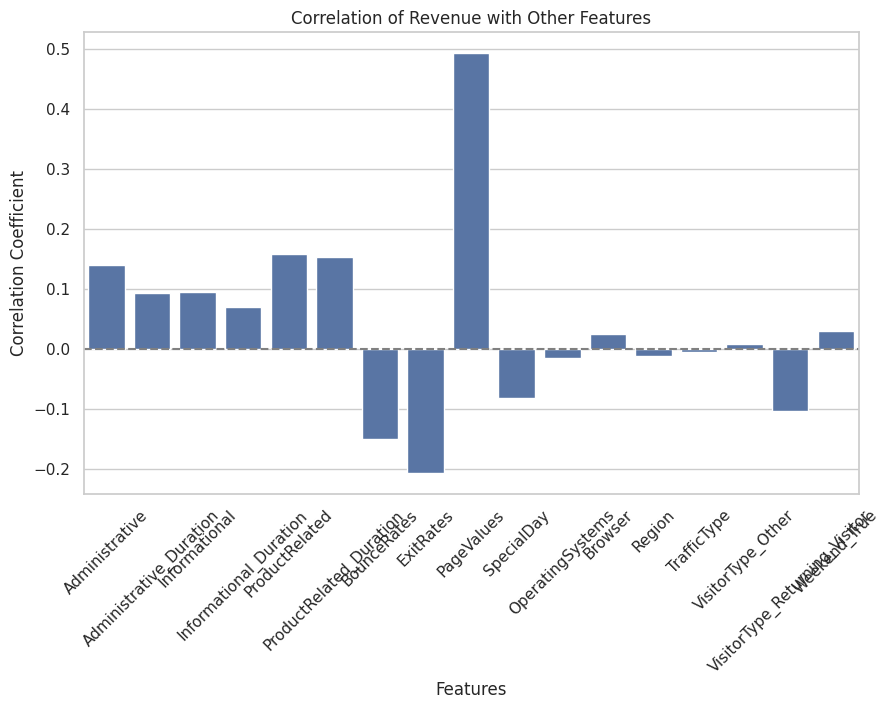

In [ ]:
data = pd.read_csv('/content/online_shoppers_intention.csv')
data['Revenue'] = data['Revenue'].astype(int)
data_encoded = pd.get_dummies(data, columns=['VisitorType', 'Weekend'], drop_first=True)
correlation_matrix = data_encoded.corr()
revenue_correlation = correlation_matrix['Revenue'].drop('Revenue')
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_correlation.index, y=revenue_correlation.values)
plt.title('Correlation of Revenue with Other Features')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.show()


In [ ]:
selected_features = ['BounceRates', 'ExitRates', 'PageValues']
scaler = StandardScaler()
X_preprocessed = scaler.fit_transform(data[selected_features])
print(data[selected_features].describe())


        BounceRates     ExitRates    PageValues
count  12330.000000  12330.000000  12330.000000
mean       0.022191      0.043073      5.889258
std        0.048488      0.048597     18.568437
min        0.000000      0.000000      0.000000
25%        0.000000      0.014286      0.000000
50%        0.003112      0.025156      0.000000
75%        0.016813      0.050000      0.000000
max        0.200000      0.200000    361.763742


In [ ]:
print(data.isnull().sum())
data = data.dropna()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


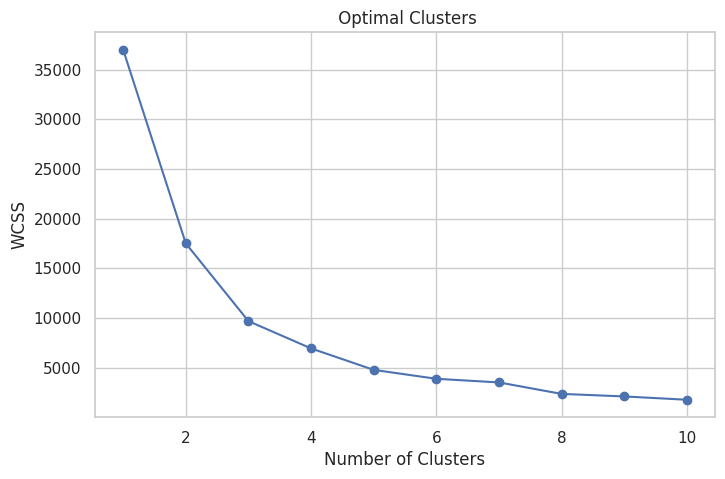

In [ ]:
def plot_elbow_method(data, max_k=10):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8,5))
    plt.plot(range(1, max_k+1), wcss, marker='o')
    plt.title(' Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow_method(X_preprocessed, max_k=10)


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)

data['Cluster'] = clusters


In [ ]:
sil_score = silhouette_score(X_preprocessed, clusters)
print(f'Silhouette Score for 3 Clusters: {sil_score:.2f}')


Silhouette Score for 3 Clusters: 0.73


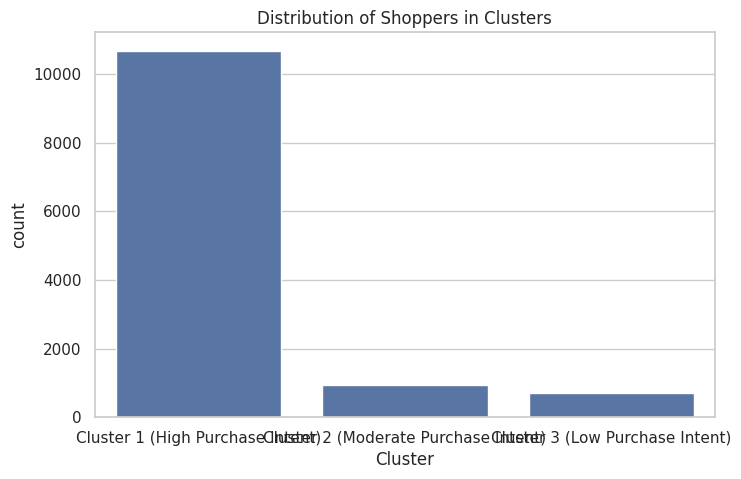

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])

cluster_analysis = numeric_data.groupby(data['Cluster']).mean()


cluster_labels = {
    0: 'Cluster 1 (High Purchase Intent)',
    1: 'Cluster 2 (Moderate Purchase Intent)',
    2: 'Cluster 3 (Low Purchase Intent)'
}

cluster_analysis['Cluster Label'] = [cluster_labels[i] for i in cluster_analysis.index]


plt.figure(figsize=(8,5))
sns.countplot(x='Cluster', data=data)
plt.xticks(ticks=[0, 1, 2], labels=[cluster_labels[i] for i in range(3)])
plt.title('Distribution of Shoppers in Clusters')
plt.show()


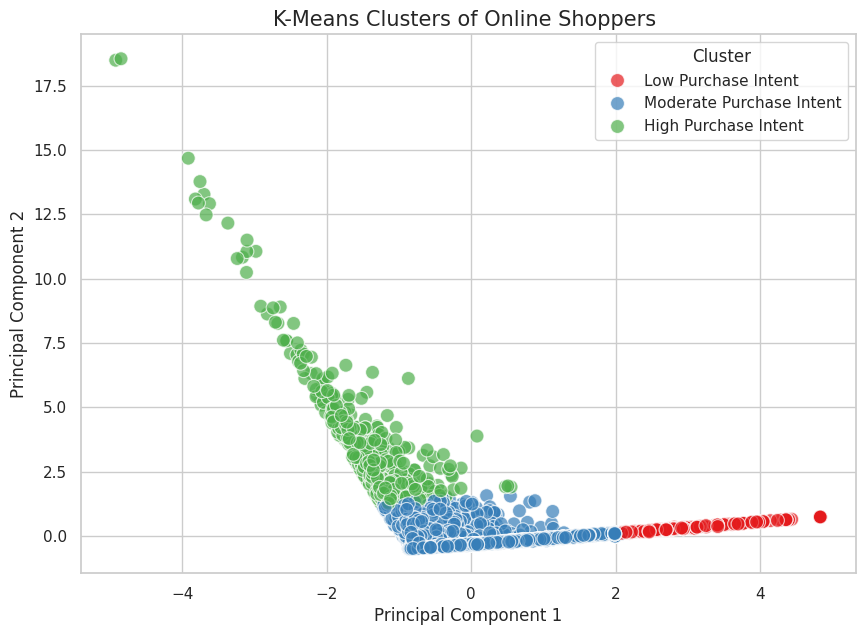

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_preprocessed)

data['PC1'] = pca_components[:, 0]
data['PC2'] = pca_components[:, 1]

cluster_labels = {
    0: 'Moderate Purchase Intent',
    1: 'Low Purchase Intent',
    2: 'High Purchase Intent'
}

data['Cluster_Label'] = data['Cluster'].map(cluster_labels)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_Label', data=data, palette='Set1', s=100, alpha=0.7)
plt.title('K-Means Clusters of Online Shoppers ', fontsize=15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()
